<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
from astropy.io import fits
%matplotlib inline

GPU acceleration not available, sorry
No module named 'pycuda'


In [2]:
res = {}

In [3]:
regions = []
for r in [10,20,30]:
    try:
        res['r{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taufull_r{:d}.csv'.format(r),
                                                            run_name='Wide Region {:d}'.format(r))
        res['r{:d}_nm'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taunomu_r{:d}.csv'.format(r),
                                                            run_name='Wide Region {:d} (Distance Fixed)'.format(r))
#         res['r{:d}_wd'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_tauwide_r{:d}.csv'.format(r),
#                                                             run_name='Region {:d} (Wide)'.format(r))
        regions.append(r)
    except:
        print('r{:d} not found'.format(r))

thin_regions = []
for r in [23, 48, 70]:
    try:
        res['t{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taufull-thin_t{:d}.csv'.format(r),
                                                            run_name='Region {:d}'.format(r))
        res['t{:d}_nm'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taunomu-thin_t{:d}.csv'.format(r),
                                                            run_name='Region {:d} (Distance Fixed)'.format(r))
#         res['r{:d}_wd'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_tauwide_r{:d}.csv'.format(r),
#                                                             run_name='Region {:d} (Wide)'.format(r))
        thin_regions.append(r)
    except:
        print('t{:d} not found'.format(r))        
        

In [4]:
res

{'r10': <pcmdpy.plotting.ResultsPlotter at 0x118cccd30>,
 'r10_nm': <pcmdpy.plotting.ResultsPlotter at 0x112c9fa90>,
 'r20': <pcmdpy.plotting.ResultsPlotter at 0x118cf6f60>,
 'r20_nm': <pcmdpy.plotting.ResultsPlotter at 0x109b5e860>,
 'r30': <pcmdpy.plotting.ResultsPlotter at 0x109b5ed68>,
 'r30_nm': <pcmdpy.plotting.ResultsPlotter at 0x109b74390>,
 't23': <pcmdpy.plotting.ResultsPlotter at 0x118ccccc0>,
 't23_nm': <pcmdpy.plotting.ResultsPlotter at 0x109b74ef0>,
 't48': <pcmdpy.plotting.ResultsPlotter at 0x109b7a4e0>,
 't48_nm': <pcmdpy.plotting.ResultsPlotter at 0x109b7aac8>,
 't70': <pcmdpy.plotting.ResultsPlotter at 0x1190e20b8>,
 't70_nm': <pcmdpy.plotting.ResultsPlotter at 0x1190e26a0>}

In [5]:
res['r10_nm'].df['dmod'] = 31.3
res['r20_nm'].df['dmod'] = 31.3
res['r30_nm'].df['dmod'] = 31.3
res['t23_nm'].df['dmod'] = 31.3
res['t48_nm'].df['dmod'] = 31.3
res['t70_nm'].df['dmod'] = 31.3

In [6]:
xmax = np.max([len(r.df) for r in res.values()])
print(xmax)

15419


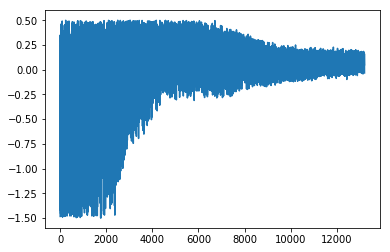

In [7]:
plt.plot(res['r10'].df['logfeh_mean'])

In [12]:
res['t23'].df.tail()

,nlive,niter,nc,eff,logl,logwt,logvol,logz,logzerr,h,delta_logz,time_elapsed,logfeh_mean,logdust,logNpix,tau,dmod,log_weights,weights
12934,2000.0,12935.0,15.0,12.253,-1101.0,-1133.0,-25.844,-1128.3,0.22903,26.253,26.814,146.169444,0.20300,-1.2154,4.0990,3.3966,30.018,-4.629116,0.009763
12935,2000.0,12936.0,7.0,12.253,-1101.0,-1133.0,-25.846,-1128.3,0.22903,26.253,26.803,146.177778,0.20122,-1.2070,4.0957,3.3840,30.008,-4.629116,0.009763
12936,2000.0,12937.0,237.0,12.227,-1101.0,-1133.0,-25.848,-1128.3,0.22903,26.254,26.792,146.513889,0.19305,-1.1982,4.1037,3.3880,30.035,-4.629116,0.009763
12937,2000.0,12938.0,113.0,12.214,-1100.9,-1133.0,-25.850,-1128.3,0.22903,26.255,26.782,146.672222,0.20045,-1.1719,4.0926,3.5136,30.009,-4.529116,0.010790
12938,2000.0,12939.0,72.0,12.207,-1100.9,-1133.0,-25.852,-1128.3,0.22904,26.255,26.771,146.775000,0.18142,-1.2007,4.0890,3.3276,30.001,-4.529116,0.010790


In [13]:
res['t23_nm'].df.tail()

,nlive,niter,nc,eff,logl,logwt,logvol,logz,logzerr,h,delta_logz,time_elapsed,logfeh_mean,logdust,logNpix,tau,log_weights,weights,dmod
12434,2000.0,12435.0,99.0,11.629,-2183.3,-2214.4,-24.845,-2209.6,0.22444,25.211,31.952,146.638889,0.12373,-1.0040,4.5870,3.8432,-4.608838,0.009963,31.3
12435,2000.0,12436.0,6.0,11.629,-2183.3,-2214.4,-24.847,-2209.6,0.22444,25.212,31.941,146.647222,0.12333,-1.0067,4.5867,3.8363,-4.608838,0.009963,31.3
12436,2000.0,12437.0,60.0,11.624,-2183.3,-2214.4,-24.849,-2209.6,0.22444,25.213,31.931,146.733333,0.13938,-1.0031,4.5891,3.8790,-4.608838,0.009963,31.3
12437,2000.0,12438.0,72.0,11.617,-2183.2,-2214.3,-24.851,-2209.6,0.22445,25.214,31.920,146.836111,0.14706,-1.0033,4.5891,3.9194,-4.508838,0.011011,31.3
12438,2000.0,12439.0,106.0,11.606,-2183.2,-2214.3,-24.853,-2209.6,0.22445,25.215,31.909,146.988889,0.20141,-1.0022,4.5981,4.1232,-4.508838,0.011011,31.3


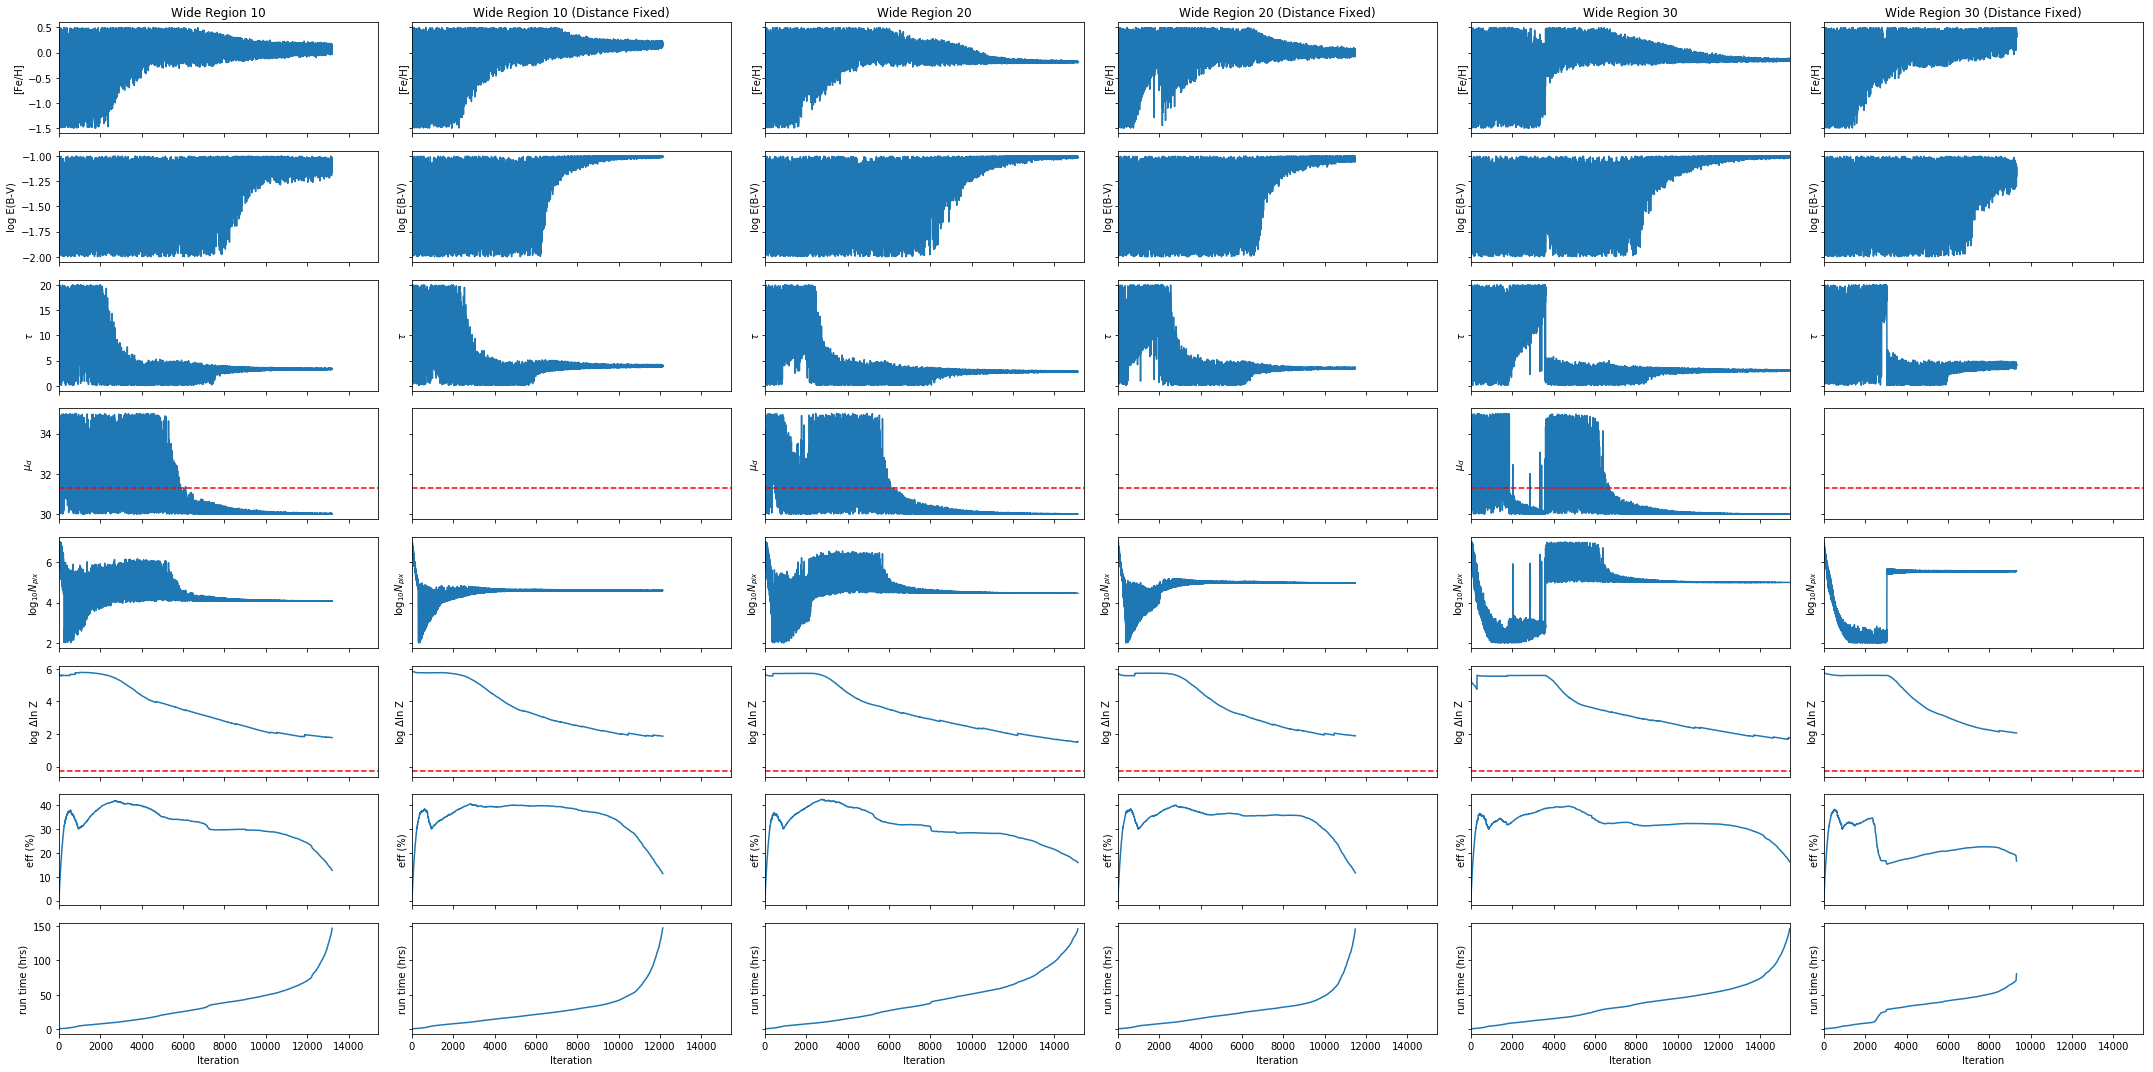

In [9]:
fig, axes = plt.subplots(ncols=2*len(regions), nrows=8, figsize=(30,15), sharex=True, sharey='row')
for i, r in enumerate(regions):
    res['r{:d}'.format(r)].plot_chains(axes=axes[:,2*i])
#     res['r{:d}_wd'.format(r)].plot_chains(axes=axes[:,3*i+1])
    res['r{:d}_nm'.format(r)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),2*i+1])
    for j in range(2):
        axes[3,j+2*i].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()

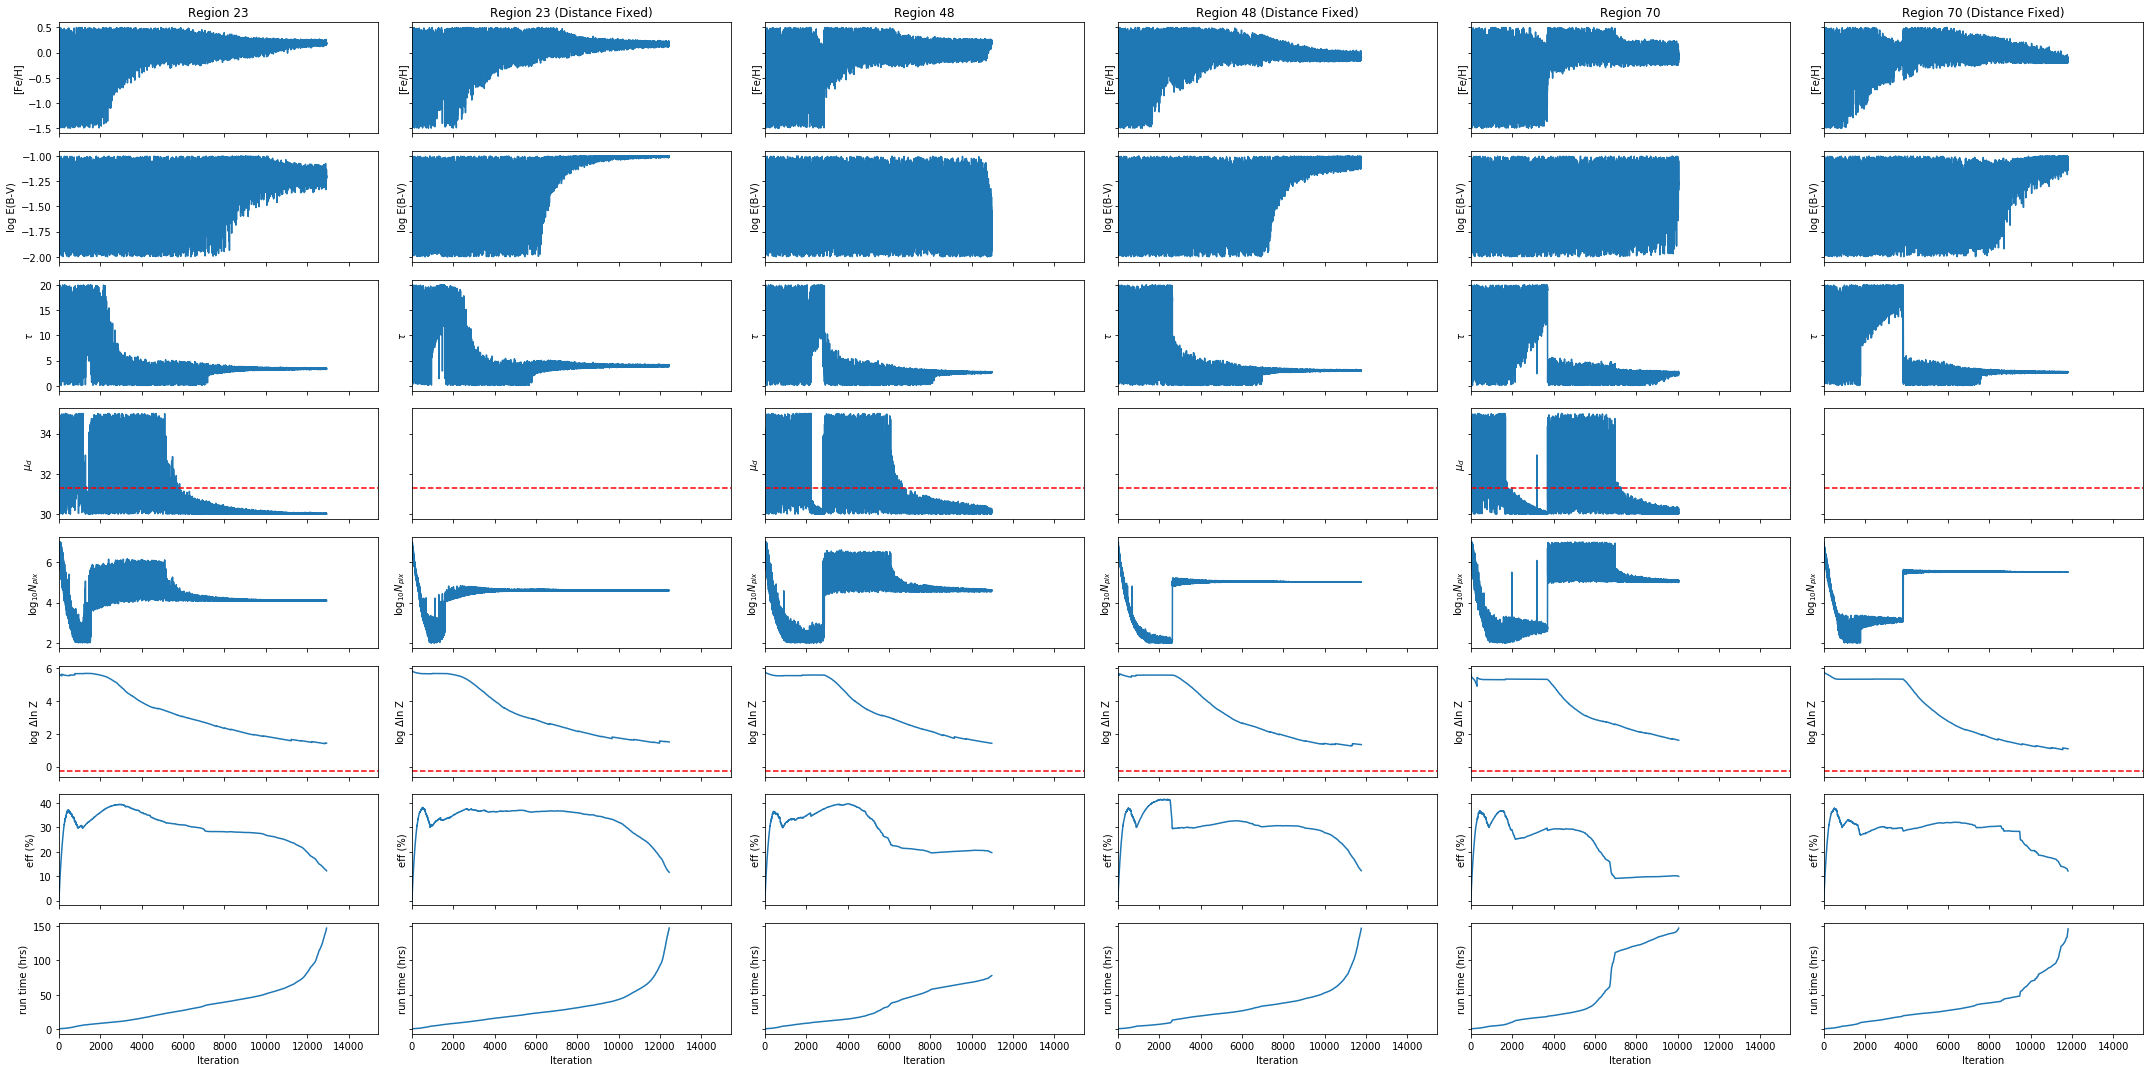

In [10]:
fig, axes = plt.subplots(ncols=2*len(thin_regions), nrows=8, figsize=(30,15), sharex=True, sharey='row')
for i, r in enumerate(thin_regions):
    res['t{:d}'.format(r)].plot_chains(axes=axes[:,2*i])
#     res['r{:d}_wd'.format(r)].plot_chains(axes=axes[:,3*i+1])
    res['t{:d}_nm'.format(r)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),2*i+1])
    for j in range(2):
        axes[3,j+2*i].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()

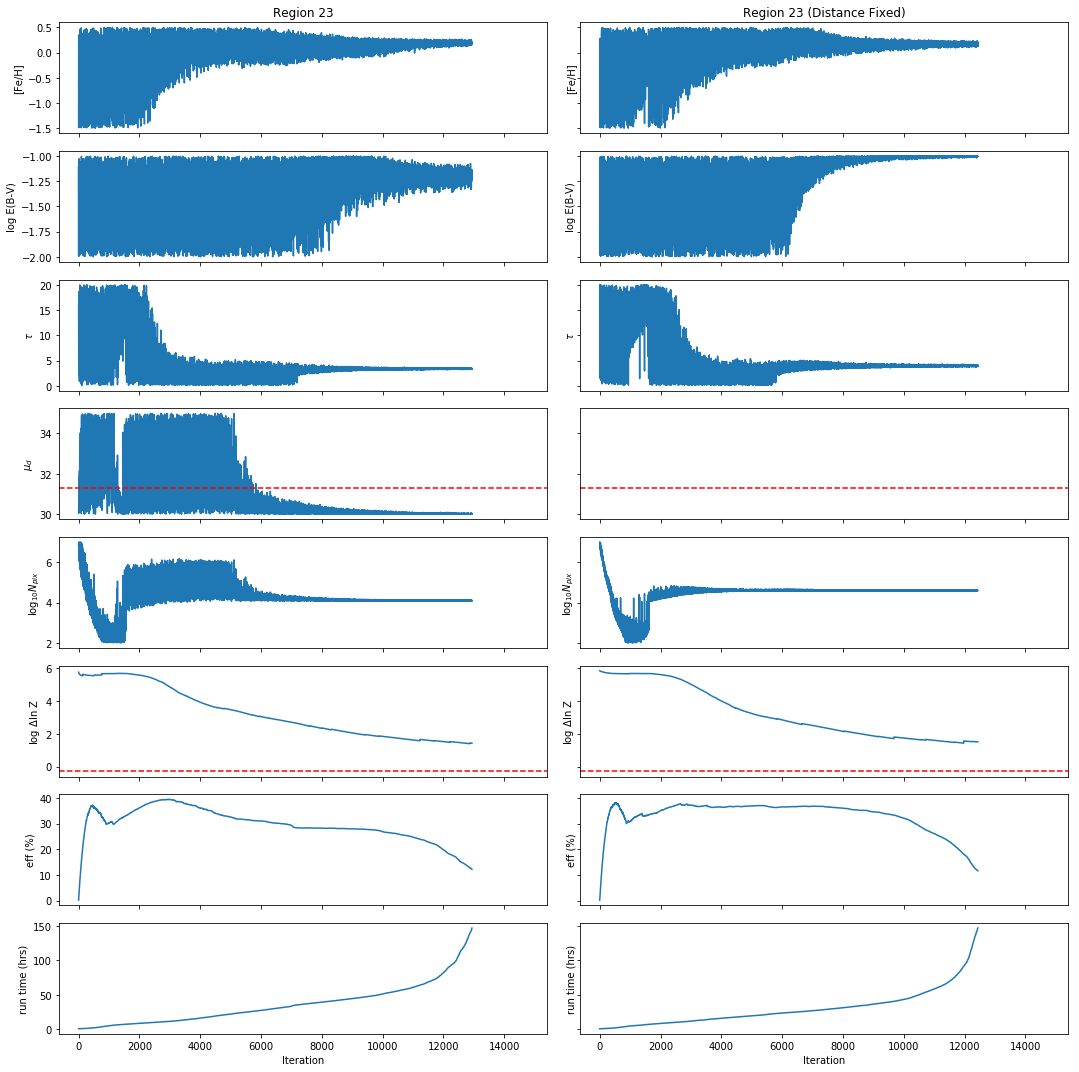

In [11]:
t = 23
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(15,15), sharex=True, sharey='row')
res['t{:d}'.format(t)].plot_chains(axes=axes[:,0])
res['t{:d}_nm'.format(t)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),1])
for j in range(2):
    axes[3,j].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()
plt.savefig('figures/m49_chains_t{:d}.jpg'.format(t))
plt.savefig('figures/m49_chains_t{:d}.pdf'.format(t))

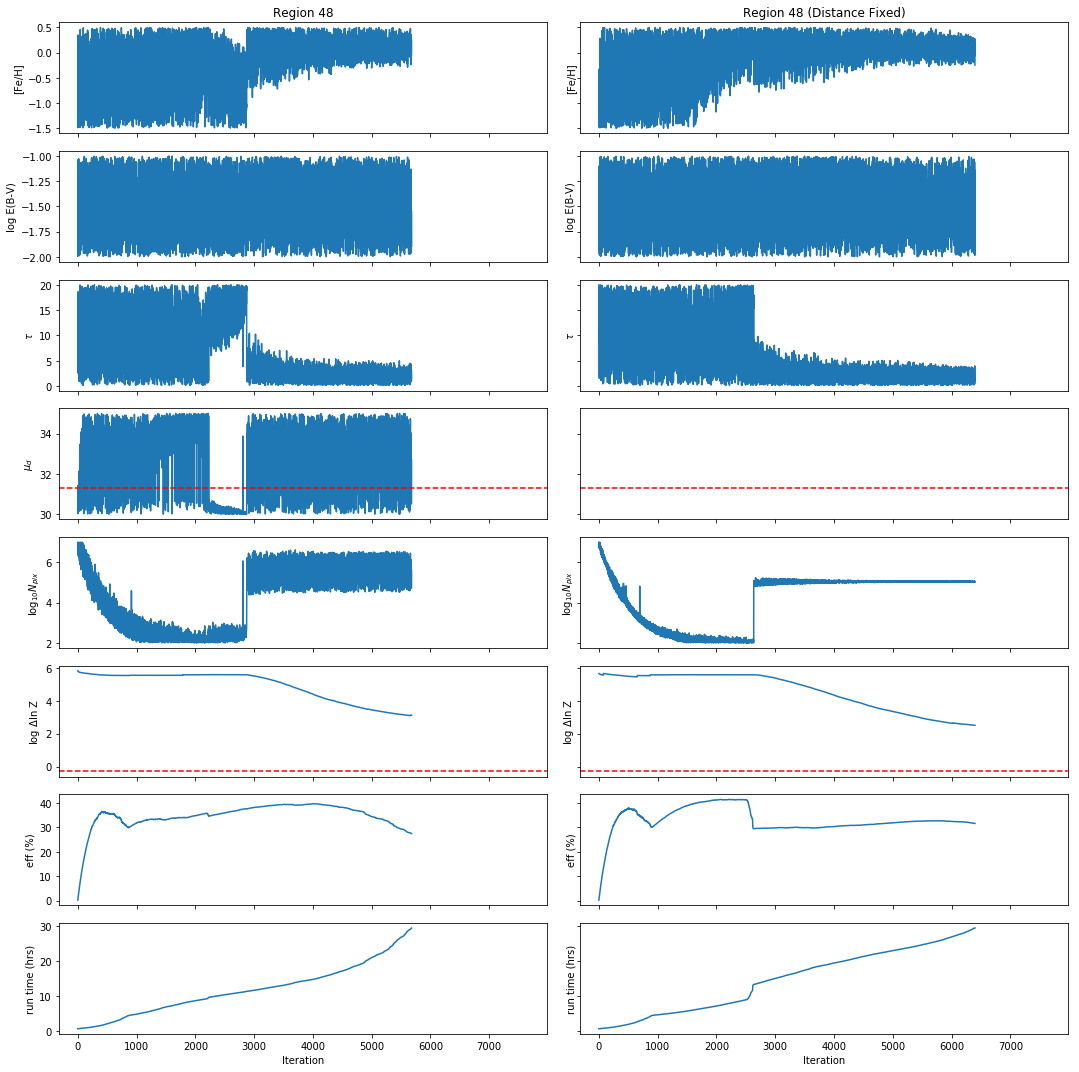

In [12]:
t = 48
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(15,15), sharex=True, sharey='row')
res['t{:d}'.format(t)].plot_chains(axes=axes[:,0])
res['t{:d}_nm'.format(t)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),1])
for j in range(2):
    axes[3,j].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()
plt.savefig('figures/m49_chains_t{:d}.jpg'.format(t))
plt.savefig('figures/m49_chains_t{:d}.pdf'.format(t))

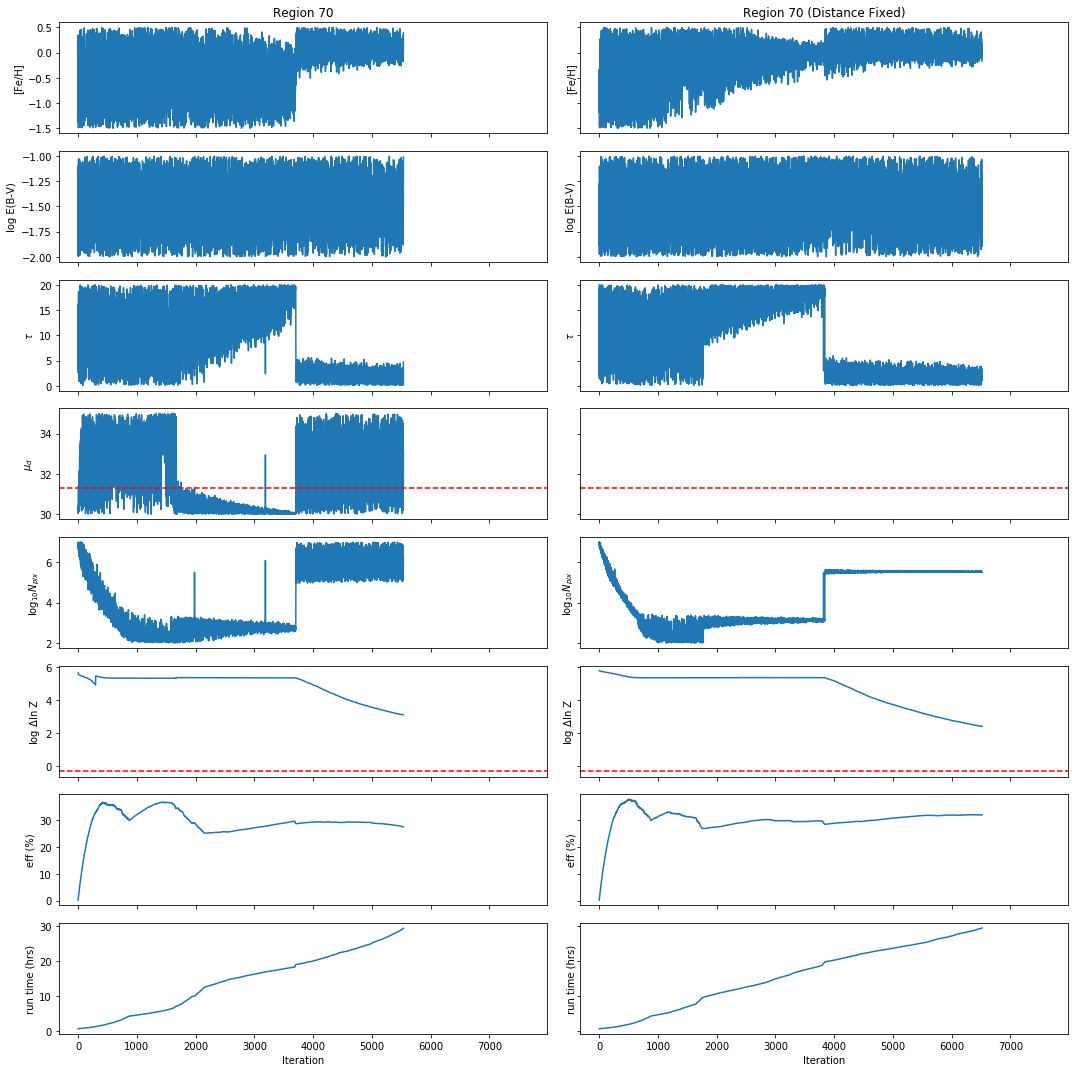

In [13]:
t = 70
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(15,15), sharex=True, sharey='row')
res['t{:d}'.format(t)].plot_chains(axes=axes[:,0])
res['t{:d}_nm'.format(t)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),1])
for j in range(2):
    axes[3,j].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()
plt.savefig('figures/m49_chains_t{:d}.jpg'.format(t))
plt.savefig('figures/m49_chains_t{:d}.pdf'.format(t))

In [50]:
res['r10'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
218,219.0,-0.08832,-1.6214,6.0822,12.806,34.657


In [14]:
res['r10_nm'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
228,229.0,-0.84726,-1.7481,5.1877,4.2317,31.3


In [15]:
res['r20'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
208,209.0,-0.79729,-1.5418,4.6282,13.798,30.018


In [16]:
res['r20_nm'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
228,229.0,-1.108,-1.9613,5.0793,11.336,31.3


In [17]:
res['r30'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
208,209.0,-1.1333,-1.293,4.9231,9.3411,31.669


In [18]:
res['r30_nm'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
228,229.0,-0.85975,-1.4733,5.1486,17.642,31.3
